# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

> Answer: 
>    1. perplexity 不是越多越好, 與 samples 數量有關, samples=300 時候， 最好約落在 250 (約 7/8 sample ?)
>    2. init = gca 與 random 有差別, gca 似乎好些


In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [23]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2

perplexities = [4, 20, 60, 100, 150, 200, 250, 300, 400]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

print(f'X.shape={X.shape}, X[:10]={X[:10]}')
print(f'color.shape={color.shape}, color[:10]={color[:10]}')

X.shape=(300, 3), X[:10]=[[ 0.44399868  1.813111   -0.10397256]
 [ 0.89724097  1.54809467 -1.44154121]
 [ 0.8240493   0.6662903  -0.43348191]
 [ 0.41051068  0.16220278 -0.08814421]
 [-0.65903619  0.81448234  0.24788877]
 [ 0.98089687  0.46446828 -0.80547154]
 [-0.55488662  0.26497527  0.16807402]
 [-0.5233528   0.10685436 -1.8521161 ]
 [-0.94192794  1.45118873 -1.33581507]
 [-0.89054316  0.02285492  0.54510124]]
color.shape=(300,), color[:10]=[ 0.46005644  2.028112    0.968522    0.42301403 -0.71953656  1.37501962
 -0.58822668  3.69237354  4.36991857 -1.0985378 ]


Y.shape=(300, 2)
circles, perplexity=4 in 0.88 sec
Y.shape=(300, 2)
circles, perplexity=20 in 1.2 sec
Y.shape=(300, 2)
circles, perplexity=60 in 1.3 sec
Y.shape=(300, 2)
circles, perplexity=100 in 1.8 sec
Y.shape=(300, 2)
circles, perplexity=150 in 1.4 sec
Y.shape=(300, 2)
circles, perplexity=200 in 1.7 sec
Y.shape=(300, 2)
circles, perplexity=250 in 1.2 sec
Y.shape=(300, 2)
circles, perplexity=300 in 0.87 sec
Y.shape=(300, 2)
circles, perplexity=400 in 0.92 sec


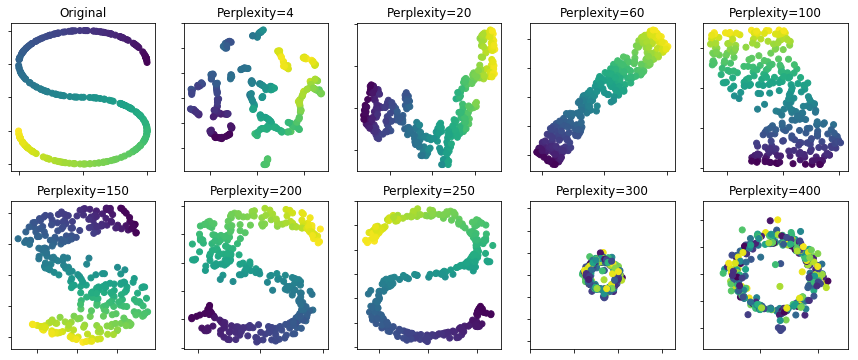

In [24]:
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))

# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")

# make_s_curve => Generate a 3D S curve.
# If we want 2D => X[,0] + + X[,2]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    # n_components: 2 因為只有 2 dimension
    # perplexity: for loop 輸入
    t0 = time()
    tsne_emulator = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity)
    
    # Output predicted result to Y (shape 300x2)
    Y = tsne_emulator.fit_transform(X)
    t1 = time()
    
    print(f"Y.shape={Y.shape}")
    
    # %g (or %e): float
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    
    # Draw Y according to color
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()

#### 改變 Sample 數量，再測一次

In [26]:
# 設定模型與繪圖參數
n_samples = 800
n_components = 2

perplexities = [4, 20, 60, 150, 400, 600, 800, 900, 1000]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

print(f'X.shape={X.shape}, X[:10]={X[:10]}')
print(f'color.shape={color.shape}, color[:10]={color[:10]}')

X.shape=(800, 3), X[:10]=[[ 0.44399868  0.0799856  -0.10397256]
 [ 0.89724097  1.27941021 -1.44154121]
 [ 0.8240493   0.81660582 -0.43348191]
 [ 0.41051068  0.75481315 -0.08814421]
 [-0.65903619  1.61872994  0.24788877]
 [ 0.98089687  1.41807092 -0.80547154]
 [-0.55488662  1.90866763  0.16807402]
 [-0.5233528   0.70387248 -1.8521161 ]
 [-0.94192794  1.79508553 -1.33581507]
 [-0.89054316  1.53993437  0.54510124]]
color.shape=(800,), color[:10]=[ 0.46005644  2.028112    0.968522    0.42301403 -0.71953656  1.37501962
 -0.58822668  3.69237354  4.36991857 -1.0985378 ]


Y.shape=(800, 2)
circles, perplexity=4 in 2.8 sec
Y.shape=(800, 2)
circles, perplexity=20 in 3.9 sec
Y.shape=(800, 2)
circles, perplexity=60 in 6 sec
Y.shape=(800, 2)
circles, perplexity=150 in 7.5 sec
Y.shape=(800, 2)
circles, perplexity=400 in 11 sec
Y.shape=(800, 2)
circles, perplexity=600 in 11 sec
Y.shape=(800, 2)
circles, perplexity=800 in 5.3 sec
Y.shape=(800, 2)
circles, perplexity=900 in 5.5 sec
Y.shape=(800, 2)
circles, perplexity=1000 in 5.6 sec


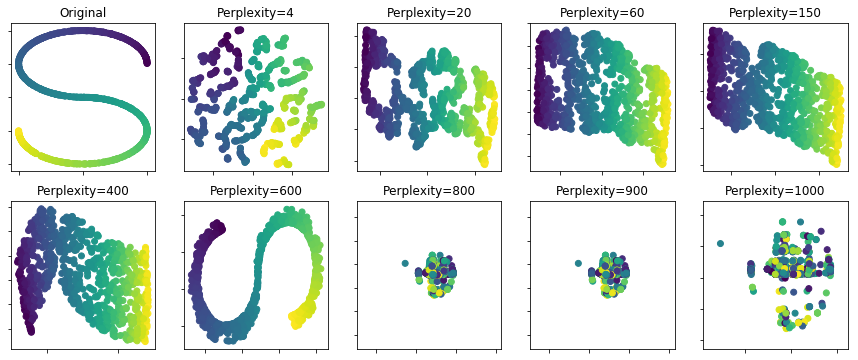

In [27]:
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))

# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")

# make_s_curve => Generate a 3D S curve.
# If we want 2D => X[,0] + + X[,2]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# 繪製不同 perplexity 下的 t-SNE 分群圖
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    # n_components: 2 因為只有 2 dimension
    # perplexity: for loop 輸入
    t0 = time()
    tsne_emulator = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity)
    
    # Output predicted result to Y (shape 300x2)
    Y = tsne_emulator.fit_transform(X)
    t1 = time()
    
    print(f"Y.shape={Y.shape}")
    
    # %g (or %e): float
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    
    # Draw Y according to color
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()